# Kaggle Competition Titanic Dataset Learning

In [1]:
TRAINNAME = "train.csv"
TESTNAME = "test.csv"

## Load Data

In [2]:
import pandas as pd
def readTrainData():
    return pd.read_csv(TRAINNAME)
def readTestData():
    return pd.read_csv(TESTNAME)

In [3]:
titanicTrain = readTrainData()

## Data Statistics

In [4]:
titanicTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Cleaning Data
Need to convert the text fields into numbers to train on

In [34]:
titanicTrain_cat = titanicTrain[["Sex"]]
titanicTrain_cat.head(10)

,Sex
0,male
1,female
2,female
3,female
4,male
5,male
6,male
7,male
8,female
9,female


In [28]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
titanicTrainEncoder = ordinal_encoder.fit_transform(titanicTrain)
titanicTrainEncoder[:10]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

## Split Data

| Data            | Data, Labels     |
|-----------------|------------------|
| Training Data   | X_train, y_train |
| Validation Data | X_val, y_val     |
| Test Data       | X_test           |

In [5]:
X_train_val = titanicTrain.drop("Survived", axis=1)
y_train_val = titanicTrain["Survived"].copy()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=150, random_state=42)

In [7]:
X_test = readTestData()

## Analysing Data

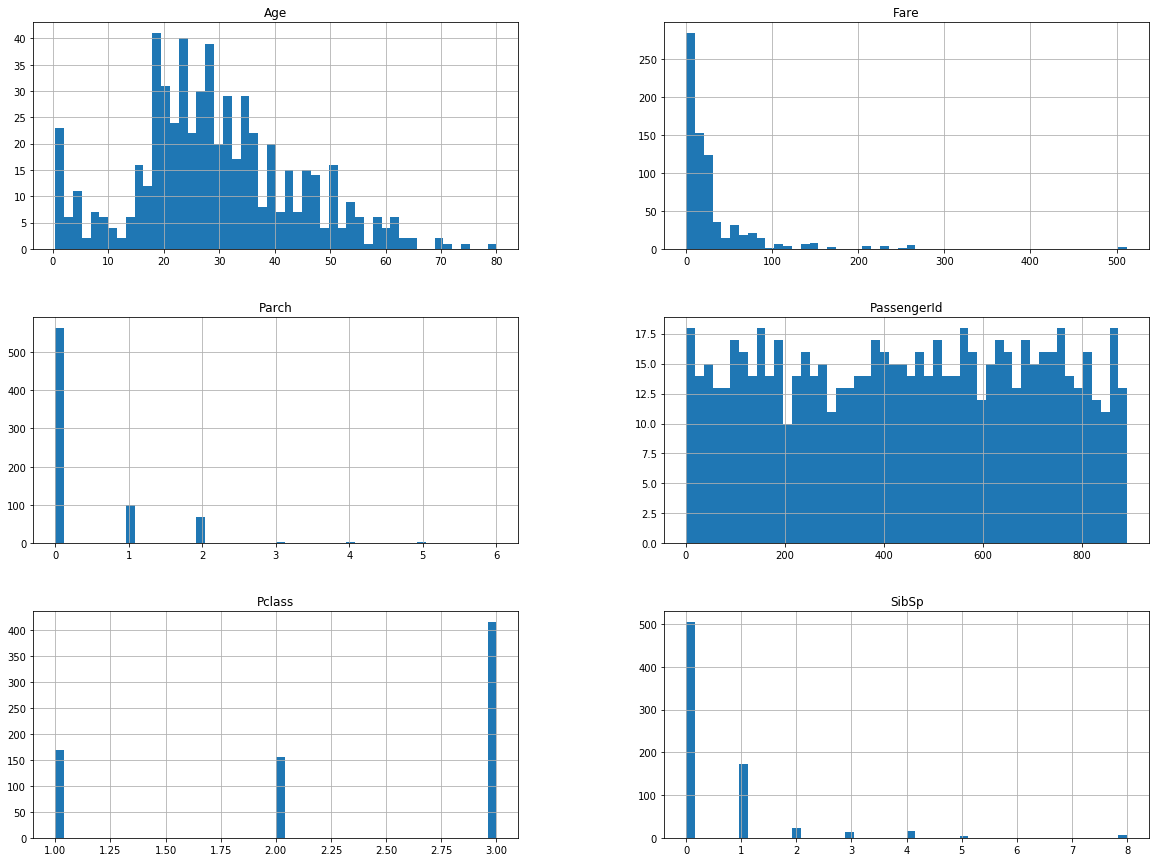

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix = titanicTrain.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## Learning

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy")

/Users/Duncan/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Duncan/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'S'